# DBSCAN

### 비지도 학습으로 군집 알고리즘
#### 클러스터 갯수를 미리 지정할 필요 없으며 복잡한 형상도 찾을수 있으나 다소 느림
#### DBSCAN은 데이터가 많아 붐비는 지역을 밀집지역이라 하며 밀집 지역에 있는 포인트를 핵심 샘플이라고 함
#### 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 갯수만큼 있으면 이 데이터 포인트를 핵심 샘플로 분류
#### eps 보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐집니다.
#### 만약 eps 거리 안에 있는 포인트수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음으로 분류됨.

In [1]:
import mglearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\anaconda\envs\tf2.0\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\anaconda\envs\tf2.0\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [3]:
X.shape

(200, 2)

In [4]:
X[X > 1.5]

array([1.61859642, 1.76654633, 1.8820287 , 1.81658658, 1.92590813,
       1.84988768, 1.88406869, 1.91108938, 1.5486824 , 1.98046734,
       1.78137056, 1.9796026 , 2.00639179, 1.99019644, 1.98845457,
       2.00751107, 1.78298331, 1.73616653, 1.97425572, 1.54651932,
       1.94401554, 1.98387143, 1.60101745, 2.01865957, 1.68071768,
       1.67240934, 1.56418943, 1.84489829, 1.92892164, 1.78673422,
       1.95130228, 1.88281749, 1.62152568])

In [5]:
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
X_scaled[:5]

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812]])

In [7]:
dbscan = DBSCAN(eps=0.5)  

In [8]:
clusters = dbscan.fit_predict(X_scaled)

In [9]:
clusters   # 0,1 두개의 클러스터

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

Text(0, 0.5, 'Feature 1')

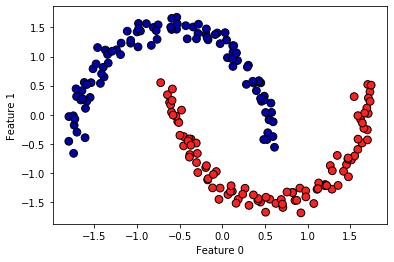

In [10]:
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### eps 0.2 변경

In [11]:
dbscan = DBSCAN(eps=0.2)  
clusters = dbscan.fit_predict(X_scaled)

In [12]:
np.unique(clusters)  # -1 ~ 6 여덟개의 클러스터

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

Text(0, 0.5, 'Feature 1')

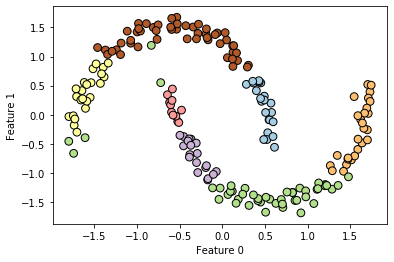

In [13]:
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=np.abs(clusters), cmap='Paired', s=60, edgecolors='black')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")